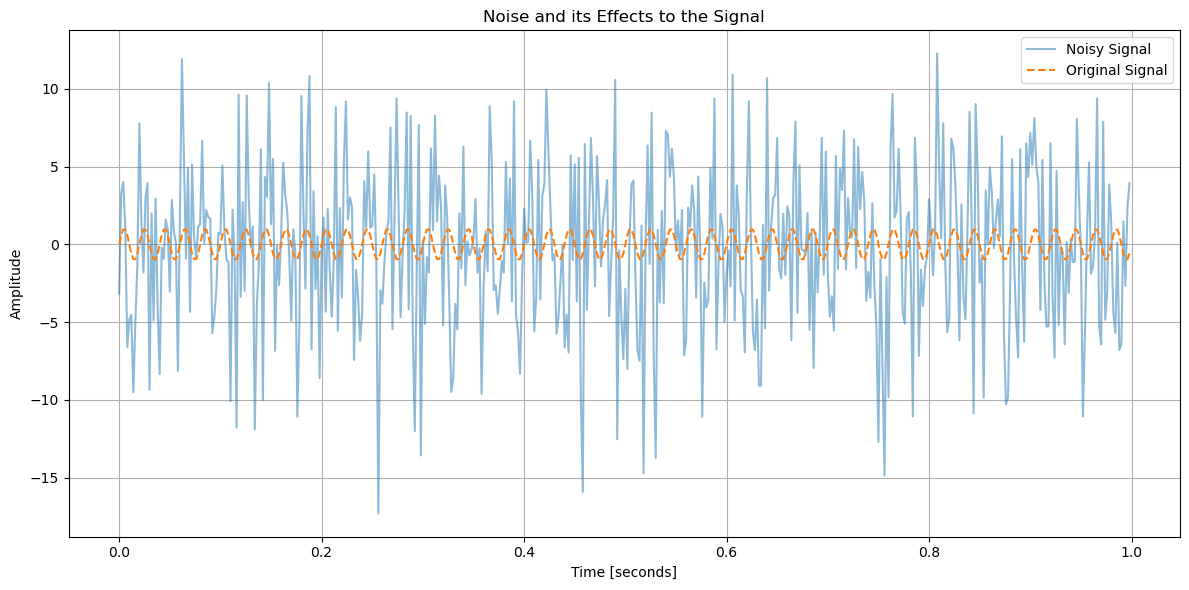

In [14]:
# Add noise

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt


SNR_dB = -20
freq = 50 #Hz

def add_awgn(signal, snr_db):
    signal_power = np.mean(np.abs(signal)**2)
    snr_linear = 10**(snr_db / 10)
    noise_power = signal_power / snr_linear
    noise = np.sqrt(noise_power / 2) * (np.random.randn(*signal.shape) + 1j * np.random.randn(*signal.shape))
    return signal + noise



# Generate a sample signal: sine wave + noise
fs = 500  # Sampling frequency (Hz)
t = np.linspace(0, 1, fs, endpoint=False)
clean_signal = np.sin(2 * np.pi * freq * t)  # 5 Hz sine wave
#noise = np.random.normal(0, 0.5, t.shape)
noisy_signal = add_awgn(clean_signal, SNR_dB)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(t, noisy_signal, label='Noisy Signal', alpha=0.5)
plt.plot(t, clean_signal, label='Original Signal', linestyle='--')
plt.xlabel('Time [seconds]')
plt.ylabel('Amplitude')
plt.title('Noise and its Effects to the Signal')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

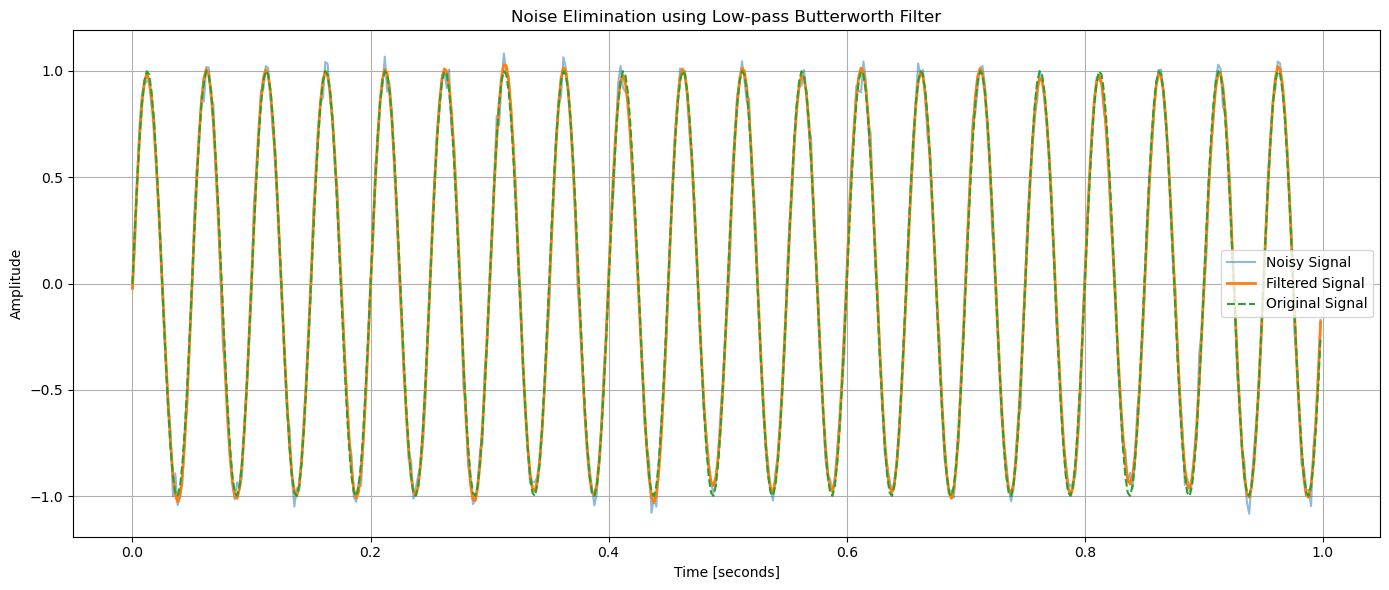

In [22]:
#Applying filter to recover the original signal
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

SNR_dB = 20
freq = 20 #Hz
#cutoff_frequency = 50 


def add_awgn(signal, snr_db):
    signal_power = np.mean(np.abs(signal)**2)
    snr_linear = 10**(snr_db / 10)
    noise_power = signal_power / snr_linear
    noise = np.sqrt(noise_power / 2) * (np.random.randn(*signal.shape) + 1j * np.random.randn(*signal.shape))
    return signal + noise
    
# Butterworth low-pass filter design
def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyq = 0.5 * fs  # Nyquist frequency
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Generate a sample signal: sine wave + noise
fs = 500  # Sampling frequency (Hz)
t = np.linspace(0, 1, fs, endpoint=False)
clean_signal = np.sin(2 * np.pi * freq * t)  # 5 Hz sine wave
#noise = np.random.normal(0, 0.5, t.shape)
noisy_signal = add_awgn(clean_signal, SNR_dB)

# Apply the filter
cutoff_frequency = 50  # Hz
filtered_signal = butter_lowpass_filter(noisy_signal, cutoff_frequency, fs)

# Plotting
plt.figure(figsize=(14, 6))
plt.plot(t, noisy_signal, label='Noisy Signal', alpha=0.5)
plt.plot(t, filtered_signal, label='Filtered Signal', linewidth=2)
plt.plot(t, clean_signal, label='Original Signal', linestyle='--')
plt.xlabel('Time [seconds]')
plt.ylabel('Amplitude')
plt.title('Noise Elimination using Low-pass Butterworth Filter')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

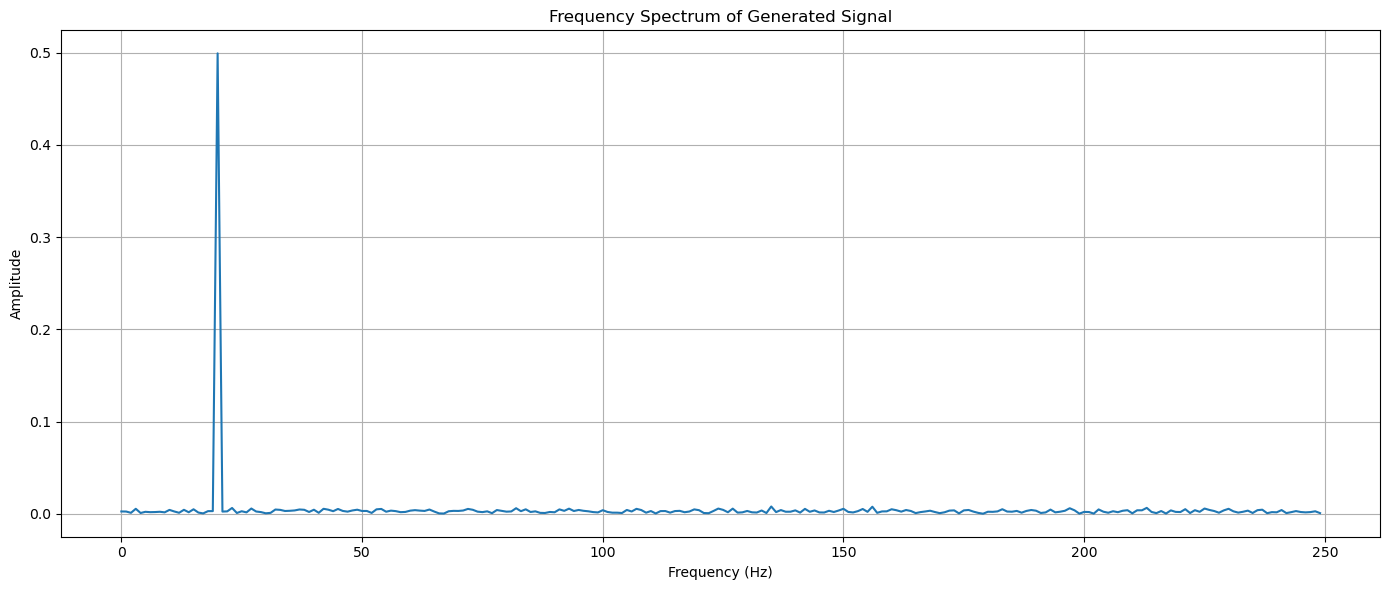

In [23]:
# Determine the frequency components of the signal
signal = noisy_signal
N = len(signal)
#fs = sampling_rate
fft_vals = np.fft.fft(signal)
fft_freqs = np.fft.fftfreq(N, 1/fs)

# Keep only positive frequencies
mask = fft_freqs >= 0
fft_freqs = fft_freqs[mask]
amplitude = np.abs(fft_vals[mask]) / N  # Normalize amplitude

# Plot frequency spectrum
plt.figure(figsize=(14, 6))
plt.plot(fft_freqs, amplitude)
plt.title("Frequency Spectrum of Generated Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()